In [1]:
from emoji_playground import *
from PIL import Image
import matplotlib.pyplot as plt
import requests

In [2]:
current_emoji = current_emoji
current_filter_name = current_filter_name
emoji_code = "-".join(f"{ord(c):x}" for c in current_emoji).upper()
url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
emoji_data = Image.open(requests.get(url, stream=True).raw)
emoji_data = np.array(emoji_data.convert("RGBA"))


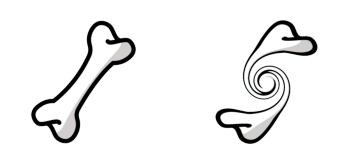

In [3]:
plt.subplot(1,2,1)
plt.imshow(emoji_data)
plt.axis("off")

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
plt.imshow(filtered_image)
plt.axis("off");